In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

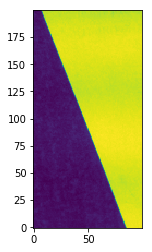

In [2]:
image = cv2.imread("ed1-rawpy.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image[150:350,250:350], origin = "lower")


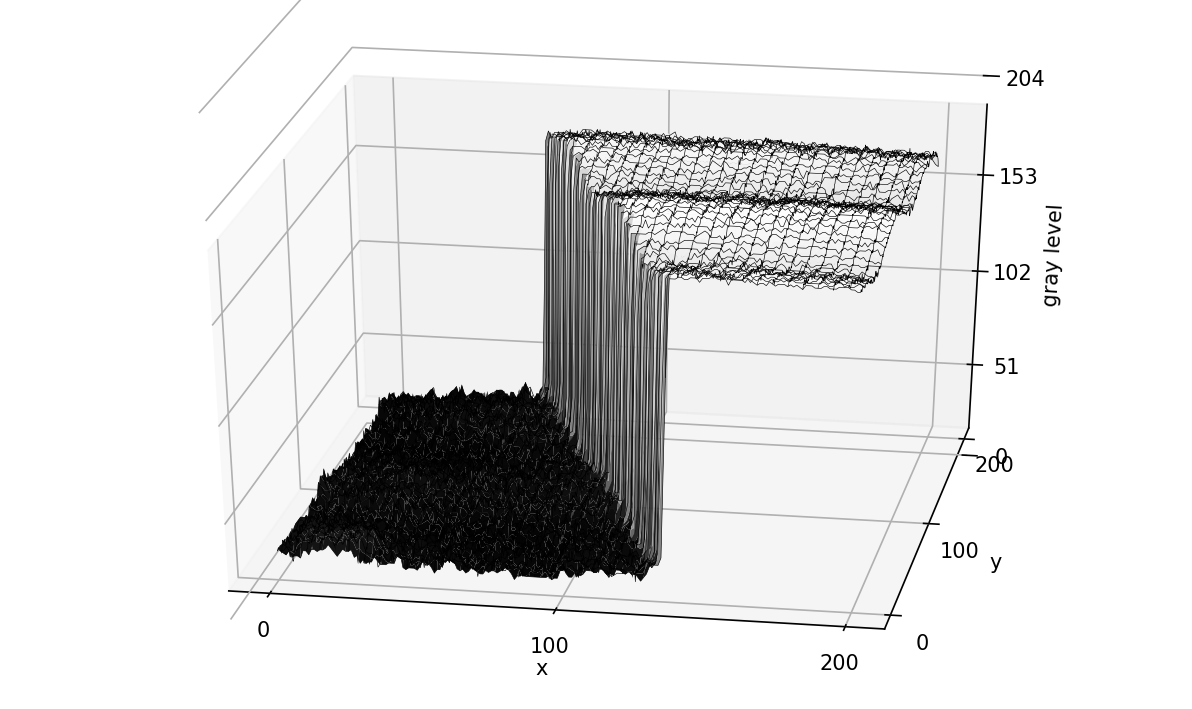

In [3]:
slant = image[150:350,200:400]

x = slant.shape[0]
y = slant.shape[1]
X,Y = np.meshgrid(range(x),range(y))
Z = slant

fig = plt.figure(figsize = [10,6], dpi = 150, facecolor = 'w')
#plt.rcParams['axes.titlesize'] = 10
plt.rcParams.update({'font.size': 10})
ax = fig.add_subplot(111, projection='3d')
p = ax.plot_surface(X, Y, Z, cmap = 'gray')
p = ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5, lw = 0.3, color = 'k')

# p = ax.contour3D(X, Y, Z, cmap = 'inferno')
ax.elev= 120
ax.xaxis.set_ticks(np.arange(0,x+1,x/2))
ax.yaxis.set_ticks(np.arange(0,y+1,y/2))
ax.zaxis.set_ticks(np.arange(0, 256, 255/5))
ax.view_init(azim=-80)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('gray level')
#fig.colorbar(p)
plt.grid("off")
plt.show()


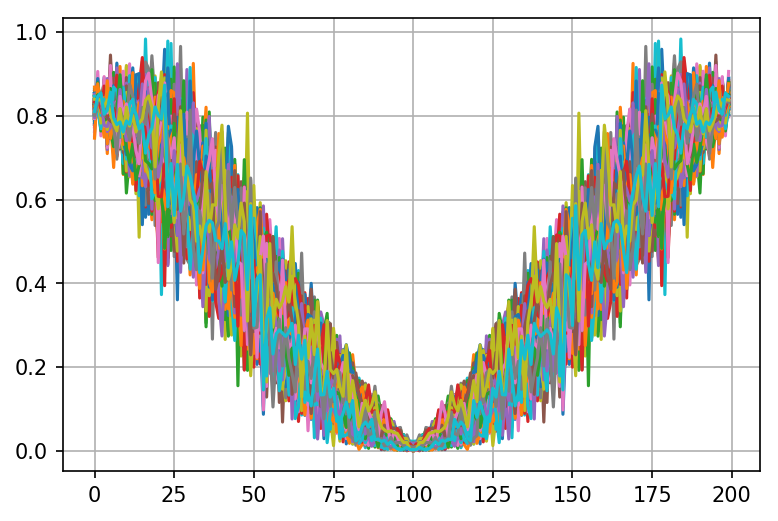

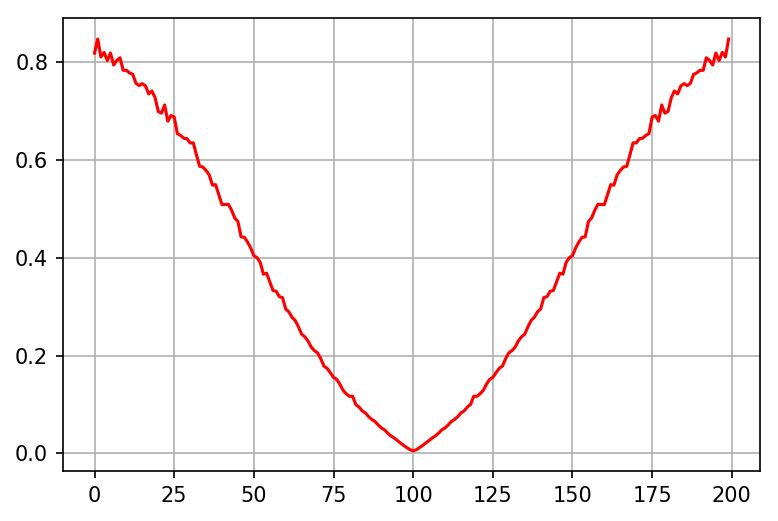

In [54]:
MTF = np.zeros(shape=[200,200])
plt.figure(dpi = 150)
for i in range(slant.shape[0]):
    linescan = slant[i,:]
    linescan = linescan/linescan.max()
    dx = np.gradient(linescan)
    mtf = np.abs(np.fft.fft(dx))
    plt.plot(mtf)
    MTF[:,i] = mtf
plt.grid()
plt.show()
plt.figure(dpi = 150)
mean = []
for i in range(200): mean.append(np.mean(MTF[i,:]))
plt.plot(mean, 'r-')
plt.grid()
plt.show()

    

In [22]:
len(linescan)

200